## Aula 3 - Histogramas

**Histograma** é um gráfico que permite visualizar a distribuição de intensidade de uma imagem, com os pixels variando entre 0 e 255 (geralmente).

É uma forma de entender a imagem, onde conseguimos ter intuições sobre o contraste, brilho e intensidade da imagem.

### 3.1 Encontrando o histograma usando o OpenCV

Vamos importar as bibliotecas necessárias e carregar a imagem de teste:

In [33]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/lenna.jpg # Download da nossa imagem base

--2021-05-26 02:37:46--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/lenna.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/jpeg]
Saving to: ‘lenna.jpg.11’

lenna.jpg.11        100%[===================>] 462.73K  --.-KB/s    in 0.07s   

2021-05-26 02:37:46 (6.93 MB/s) - ‘lenna.jpg.11’ saved [473831/473831]



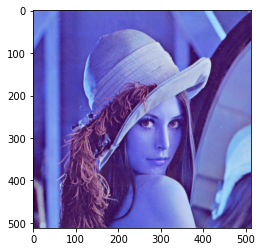

In [19]:
img = cv2.imread('lenna.jpg')
plt.imshow(img)

Podemos ver que a imagem está com os canais trocados. Por padrão, o OpenCV carrega as imagens no formato BGR ao invés de RGB. Podemos convertê-la para RGB com uma linha de código:

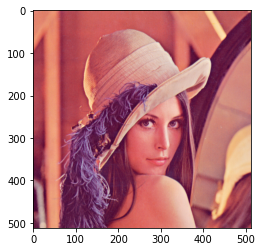

In [20]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Precisaremos transformar a imagem em tons de cinza antes de calcular o histograma. O histograma das cores será mostrado mais a frente. Para isso, começaremos a manipular a imagem usando o OpenCV. Um resultado similar pode ser alcançado usando o *Pillow* e também o *skimage*, porém o último nos retorna uma informação entre [0..1] ao invés de [0..255].

Como foi abordado no material da [aula](https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/2_representacao/lab.ipynb), complete o código abaixo para realizar a conversão de RGB para escala de cinza.

(512, 512)

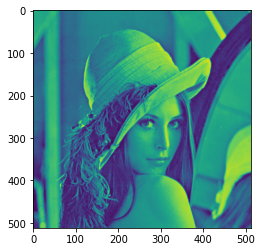

In [59]:
img_cinza = None
plt.imshow(img_cinza)
img_cinza.shape

In [54]:
# Correção do exercício
if np.sum(img_cinza) == 32518586:
  print('Correto')
else:
  print('Revisar o código da conversão')

Correto


O *matplotlib* está mostrando a imagem com 3 canais, quando ela só tem uma. Precisamos convertê-la para 3 canais, trazendo-a de volta para RGB.

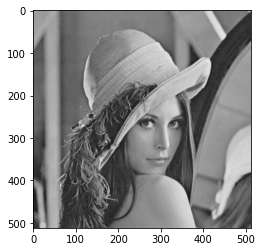

In [60]:
plt.imshow(cv2.cvtColor(img_cinza, cv2.COLOR_GRAY2RGB))

Usaremos o método [hist()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) do Matplotlib para calcular o histograma da imagem. Passaremos como argumento a resposta do método [ravel()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ravel.html), que é o vetor da imagem em 1-D.

A imagem original tem resolução de **512x512x3**, onde o 3 significam os canais RGB.
Quando a imagem é convertida para tons de cinza, esses canais são perdidos. A imagem então tem uma resolução de **512x512** (totalizando 262,144 pixels). A função ravel() nos retorna, então, um vetor de 262,144.

img_cinza contém 262144 pixels
Pixels da imagem:  [162 162 162 ... 104 105 108]


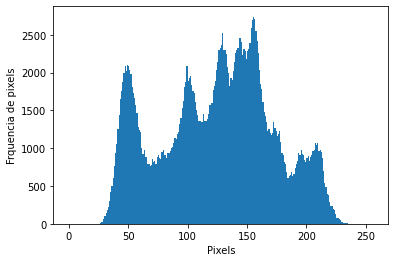

In [45]:
img_vetor = img_cinza.ravel()
print("img_cinza contém %d pixels" % img_cinza.ravel().shape[0])
print("Pixels da imagem: ", img_vetor)
plt.hist(img_vetor,256,[0,256])
plt.xlabel('Pixels')
plt.ylabel('Frquencia de pixels')
plt.show()

O método [calcHist()](https://docs.opencv.org/3.1.0/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d) do OpenCV faz o equivalente ao método hist() do matplotlib. A sintaxe é um pouco diferente, mas o resultado é o mesmo:

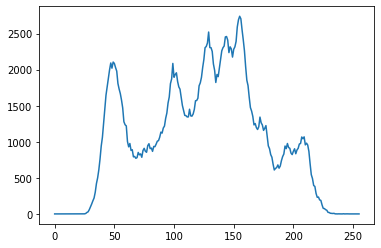

In [44]:
h = cv2.calcHist([img_vetor], [0], None, [256], [0,256])
plt.plot(h)
plt.show()

Vamos agora analisar a distribuição por canal. Usaremos apenas o OpenCV neste exemplo:

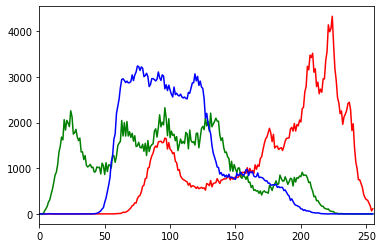

In [49]:
color = ('r','g','b')
for i,col in enumerate(color):
    h = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(h, color = col)
    plt.xlim([0,256])
plt.show()

### 3.2 Faça você mesmo

Aplique os mesmos passos anteriores na imagem a seguir, a fim de obter seu histograma.

In [62]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/home.jpg

--2021-05-26 03:14:25--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/home.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32197 (31K) [image/jpeg]
Saving to: ‘home.jpg.1’

home.jpg.1          100%[===================>]  31.44K  --.-KB/s    in 0.004s  

2021-05-26 03:14:25 (6.84 MB/s) - ‘home.jpg.1’ saved [32197/32197]



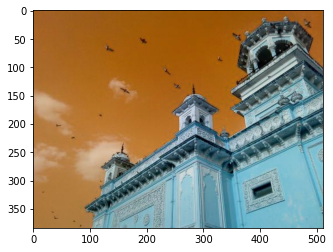

In [64]:
img = cv2.imread('home.jpg')
plt.imshow(img)

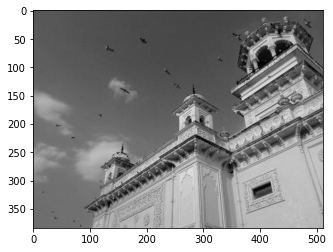

In [66]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

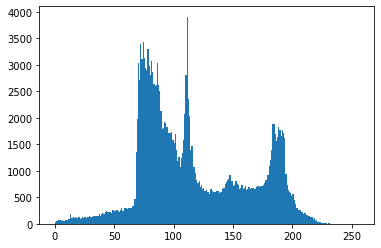

3908.0

In [91]:
a = plt.hist(gray.ravel(), 256, [0,256])
plt.show()

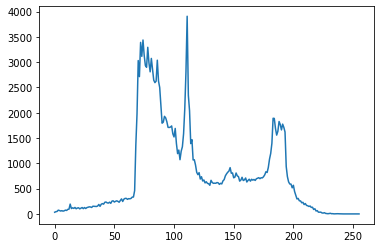

3908.0

In [90]:
hist = cv2.calcHist([gray], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()